# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [56]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
import itertools
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
rayan-homework1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [58]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [62]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


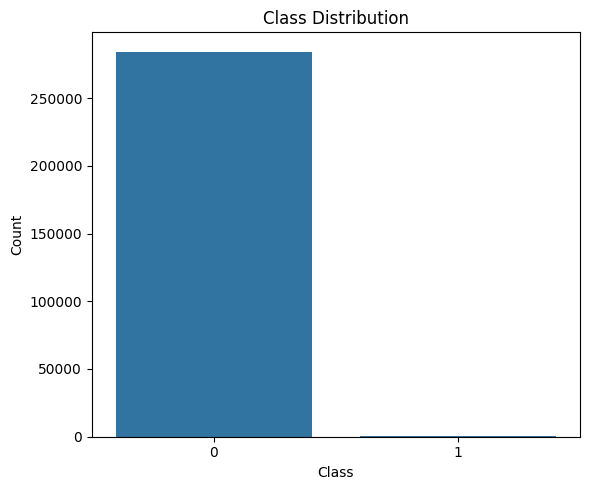

In [63]:
plt.figure(figsize=(6, 5))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.tight_layout()
plt.show()

In [64]:
tot = df.Class.count()
df.Class.value_counts() / tot * 100

,count
Class,
0,99.827251
1,0.172749


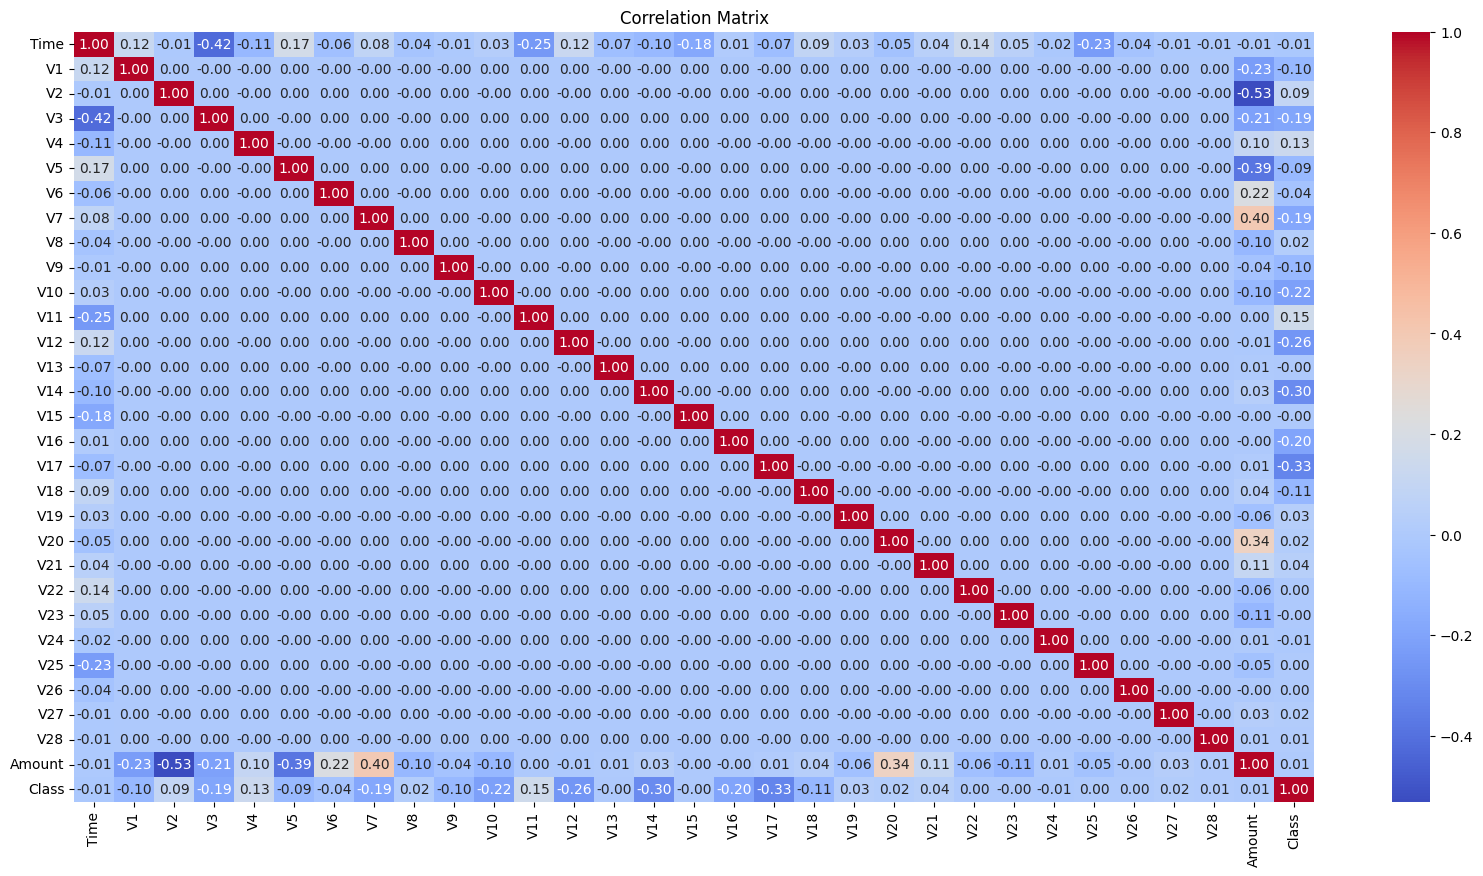

In [65]:
# Calculation of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

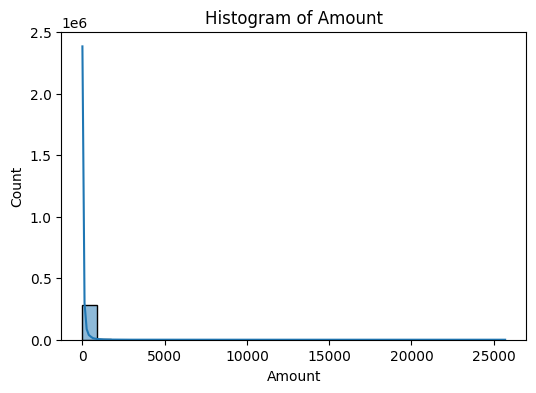

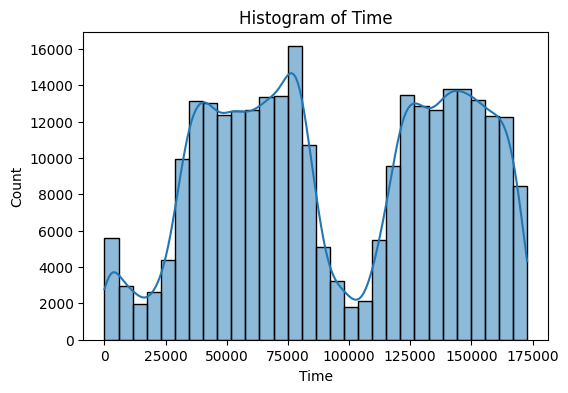

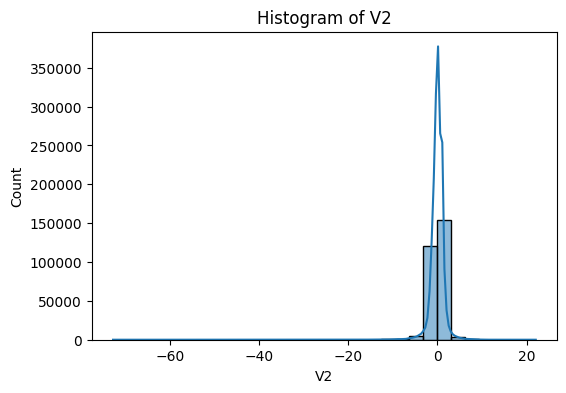

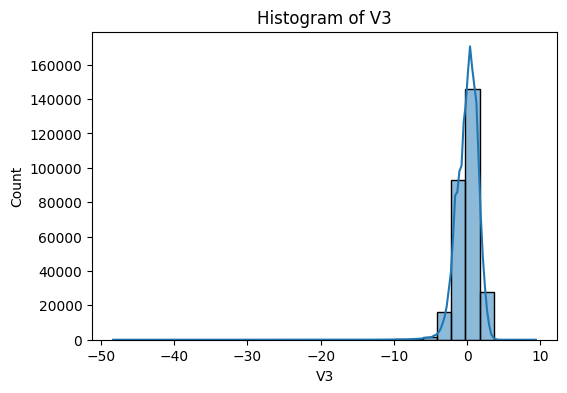

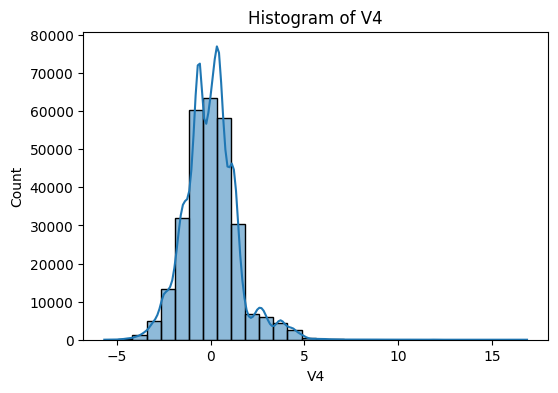

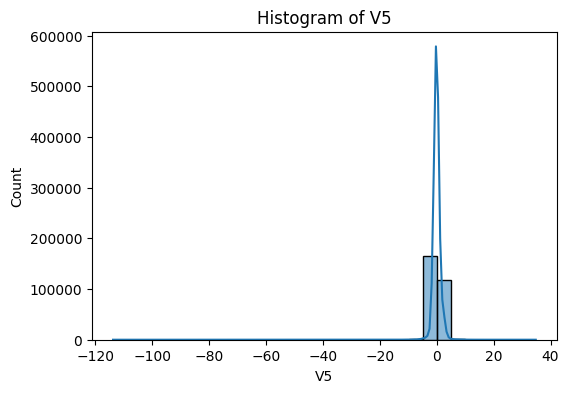

In [66]:
features_df = df[['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']]
for column in features_df:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

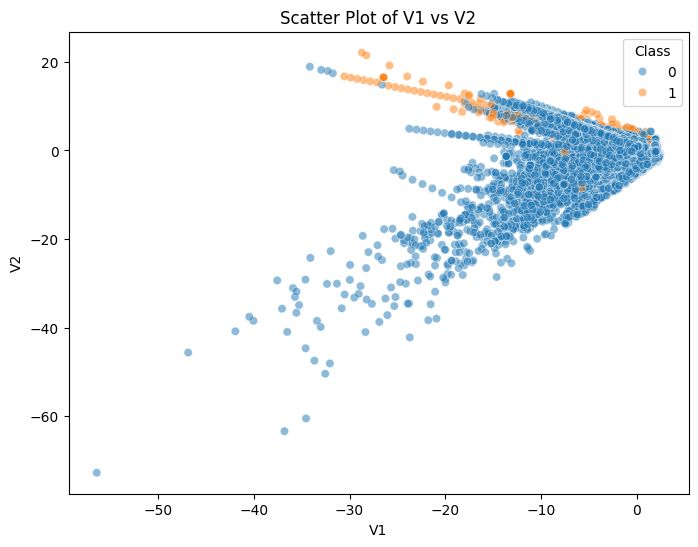

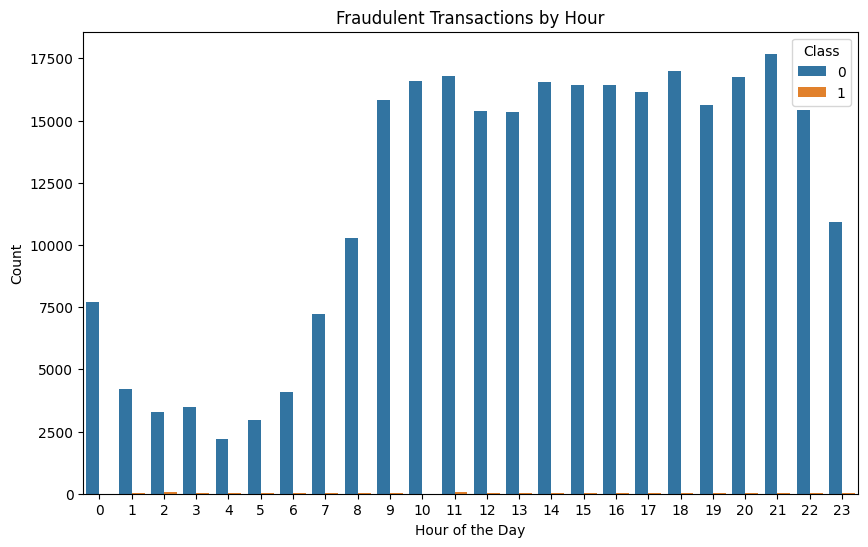

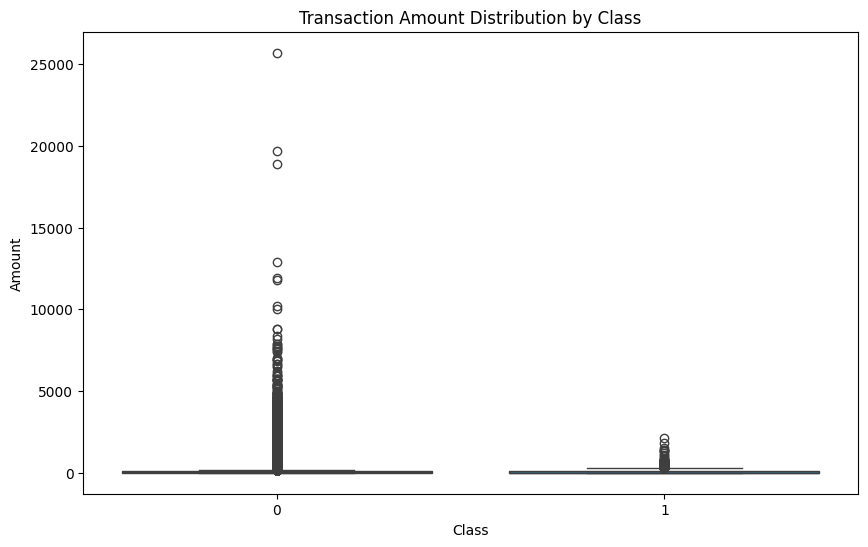

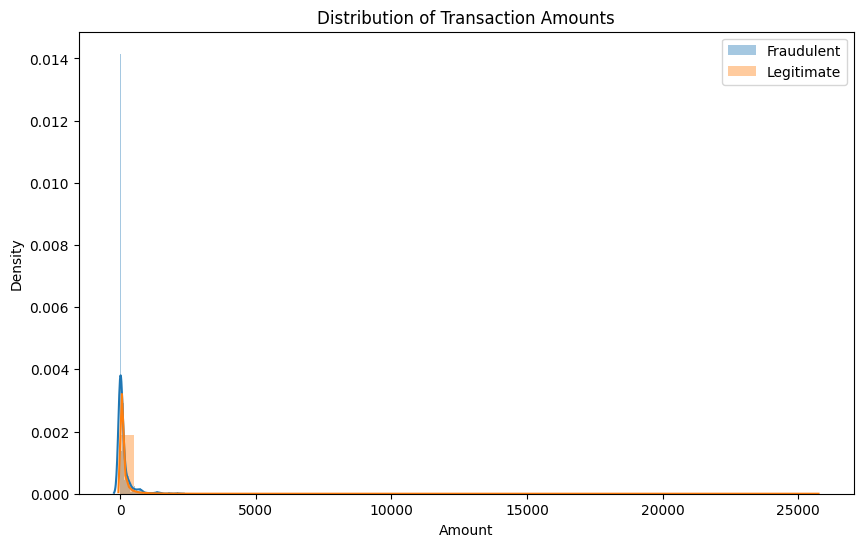

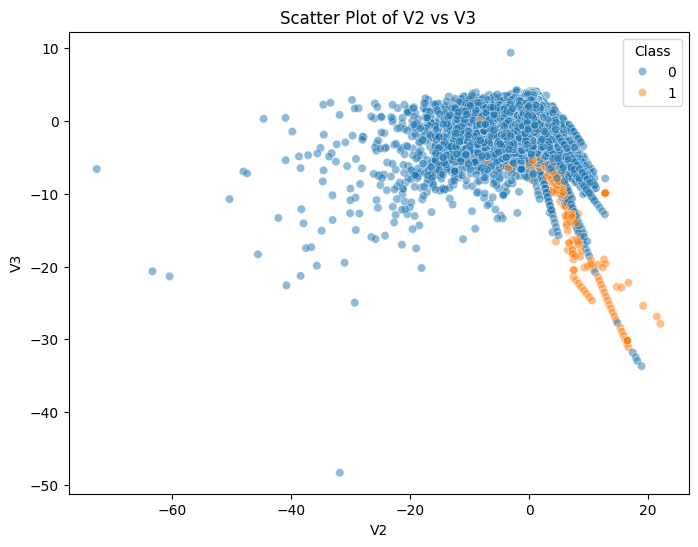

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, alpha=0.5)
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

# Analyze the distribution of fraudulent transactions over time
df['Hour'] = df['Time'].apply(lambda x: int(x / 3600) % 24)
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Class', data=df)
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

# Explore the relationship between transaction amount and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

# Investigate the distribution of transaction amounts for fraudulent and legitimate transactions
fraud_transactions = df[df['Class'] == 1]['Amount']
legit_transactions = df[df['Class'] == 0]['Amount']

plt.figure(figsize=(10, 6))
sns.distplot(fraud_transactions, kde=True, label='Fraudulent')
sns.distplot(legit_transactions, kde=True, label='Legitimate')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyze the relationship between specific features (e.g., V1, V2, V3) and fraud
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V2', y='V3', hue='Class', data=df, alpha=0.5)
plt.title('Scatter Plot of V2 vs V3')
plt.xlabel('V2')
plt.ylabel('V3')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.

  (1). Class Imbalance:
    - The dataset exhibits a severe class imbalance, with a significantly higher number of legitimate transactions (Class 0) compared to fraudulent transactions (Class 1). This imbalance can lead to biased model training, where the model may overpredict the majority class and perform poorly in identifying fraudulent transactions.

  (2). Feature Scaling:
    - The features in the dataset have different scales and ranges. For example, the 'Amount' feature has a much wider range than the 'Time' feature. This difference in scales can affect the performance of some machine learning algorithms, particularly those that are sensitive to feature scaling, such as distance-based algorithms (e.g., K-Nearest Neighbors).

===================================================================================================================
2. Analyze the correlation matrix of the features.
  - Strong Positive Correlations: These are indicated by dark red cells. For example, the feature “Amount” has a strong positive correlation with “V10” (0.53) and “V12” (0.75). This means as the value of “Amount” increases, the values of “V10” and “V12” also tend to increase.

  - Strong Negative Correlations: These are indicated by dark blue cells. For instance, “V3” has a strong negative correlation with “Time” (-0.42). This suggests that as “Time” increases, “V3” tends to decrease.

  - Weak or No Correlations: These are indicated by white or light-colored cells. For example, “V2” and “V3” have a correlation close to zero, indicating little to no linear relationship between them.
  
  - Perfect Correlations: The diagonal cells from the top left to the bottom right are all dark red (correlation of 1), as each feature is perfectly correlated with itself.

===================================================================================================================

3. Is your data linearly separable? Please provide a rationale.

   Based on the correlation matrix and the scatter plots, it's unlikely that the data is linearly separable.
 Here's why:

   - No strong linear relationships: The correlation matrix shows that there is no strong linear correlation between any two features.
     This suggests that a simple straight line cannot effectively separate the fraudulent and legitimate transactions.

   - Overlapping clusters:  The scatter plots (e.g., V2 vs V3) show that the clusters of fraudulent and legitimate transactions overlap significantly.
   This indicates that a linear boundary would likely misclassify many data points.

   - Complex patterns:  The data likely exhibits complex non-linear patterns that are not easily captured by a linear model.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [68]:
# Check for missing values
print(df.isnull().sum())

# Since there are no missing values, we don't need to handle them.

# Outlier Detection and Treatment (using IQR method for 'Amount' feature)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
df['Amount'] = np.where(df['Amount'] > upper_bound, upper_bound,
                         np.where(df['Amount'] < lower_bound, lower_bound, df['Amount']))


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


In [69]:
# Standardize the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [70]:
# Resampling using SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [71]:
# Handling Imbalanced Data (Using Random Undersampling)
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [72]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [73]:
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.60      0.71       136

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.60      0.71       136

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix, without normalization
[[85294    13]
 [   54    82]]


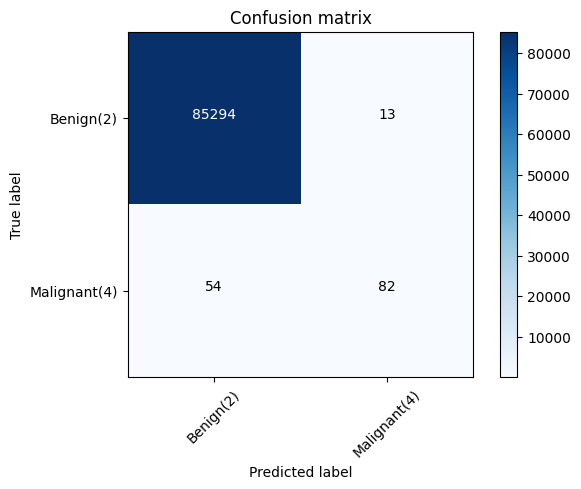

In [75]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443



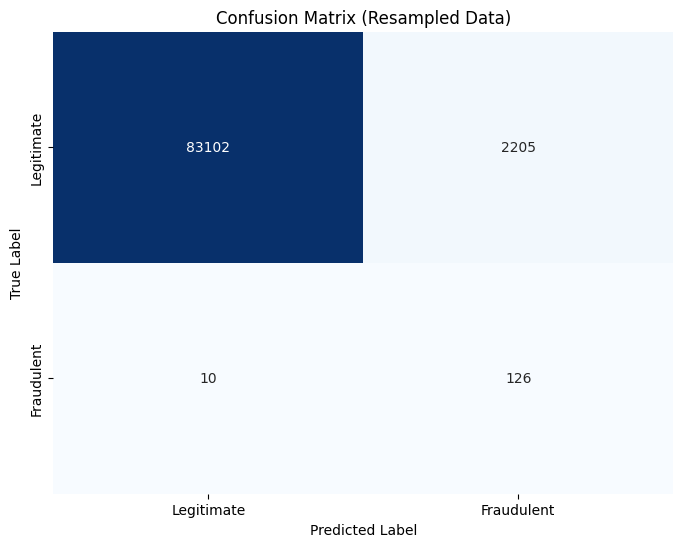

In [76]:
# enhancing performance

# Handle Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on resampled data
LR_resampled = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_resampled = LR_resampled.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_resampled))

# Calculate and plot confusion matrix for resampled model
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
from sklearn.model_selection import KFold, cross_val_score

# Assuming LR (Logistic Regression) is your best model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR, X, y, cv=kfold, scoring='recall')

print("Cross-Validation Recall Scores:", results)
print("Mean Recall:", results.mean())


Cross-Validation Recall Scores: [0.5  0.62 0.55 0.59 0.68]
Mean Recall: 0.5882548434324393


### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [78]:
from sklearn import svm

In [79]:
svc = svm.SVC(kernel='rbf')
clf = svc.fit(X_train, y_train)

In [80]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.68      0.79       136

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.68      0.79       136

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix, without normalization
[[85300     7]
 [   43    93]]


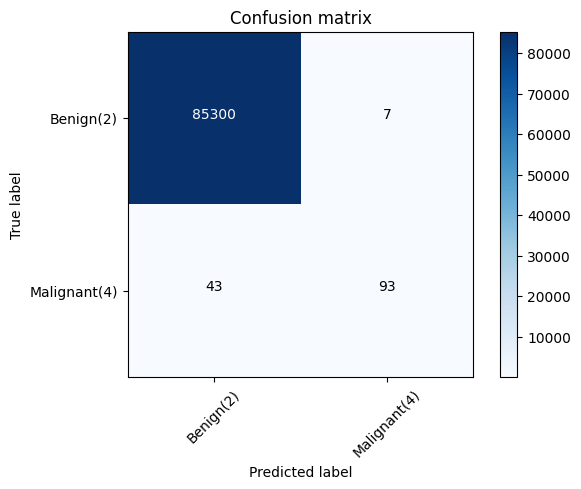

In [82]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.11      0.90      0.20       136

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443



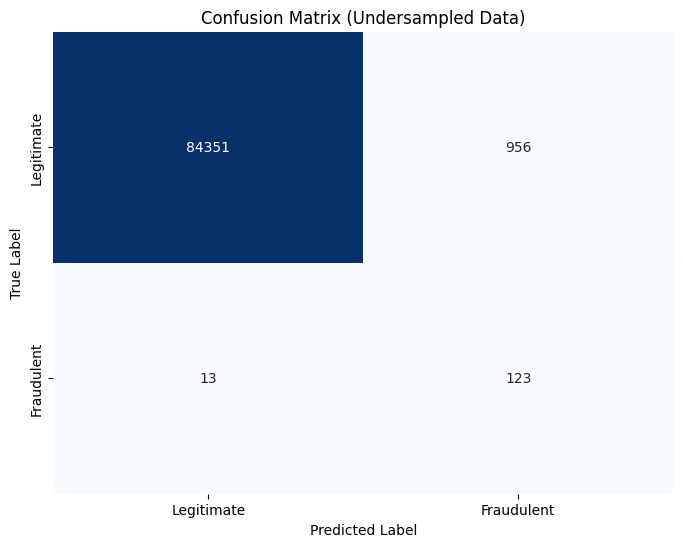

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.39      0.84      0.53       136

    accuracy                           1.00     85443
   macro avg       0.69      0.92      0.77     85443
weighted avg       1.00      1.00      1.00     85443



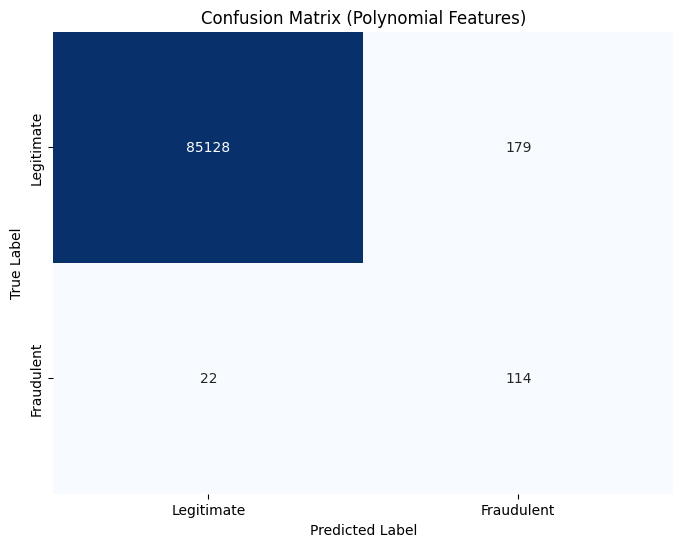

In [84]:
# enhancing performance

# Handle Class Imbalance using Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Train SVM on undersampled data
svc_undersampled = svm.SVC(kernel='rbf')
clf_undersampled = svc_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict on test set
y_pred_undersampled = clf_undersampled.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred_undersampled))

# Calculate and plot confusion matrix for undersampled model
cm_undersampled = confusion_matrix(y_test, y_pred_undersampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_undersampled, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix (Undersampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Engineering: Create Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_undersampled)
X_test_poly = poly.transform(X_test)

# Train SVM on polynomial features
svc_poly = svm.SVC(kernel='rbf')
clf_poly = svc_poly.fit(X_train_poly, y_train_undersampled)

# Predict on test set
y_pred_poly = clf_poly.predict(X_test_poly)

# Evaluate performance
print(classification_report(y_test, y_pred_poly))

# Calculate and plot confusion matrix for polynomial model
cm_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix (Polynomial Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?

  General Comparison:
  In this specific case, based on the provided metrics (precision, recall, F1-score), the Logistic Regression model trained on resampled data using SMOTE generally outperforms the SVM model, particularly in identifying fraudulent transactions (Class 1).
  However, the best model choice depends on the specific requirements and priorities of the problem. If minimizing false positives (incorrectly classifying legitimate transactions as fraud) is crucial, SVM might be preferred due to its higher precision for Class 0.
  Further experimentation with hyperparameter tuning and other techniques could potentially improve the performance of both models.

===================================================================================================================

2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.

  No, accuracy is not a suitable metric for evaluating performance in this problem due to the imbalanced nature of the dataset.
  In a highly imbalanced dataset like this credit card fraud detection scenario, where the number of fraudulent transactions is significantly lower than legitimate transactions, a model can achieve a high accuracy simply by predicting all transactions as legitimate.
  For instance, if 99.8% of transactions are legitimate, a model that always predicts "legitimate" would have 99.8% accuracy, despite failing to detect any fraudulent transactions.

===================================================================================================================

3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  Cost-Sensitive Learning
  Incorporate class weights in your model (e.g LogisticRegression, SVM) to penalize misclassifying fraudulent transactions more heavily. This encourages the model to focus on correctly identifying the minority class (fraudulent transactions).

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

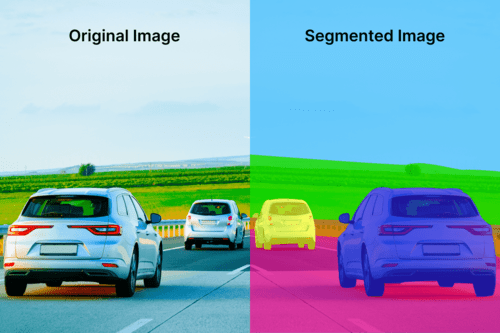

## Load Data

In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 61.1MB/s]


In [87]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


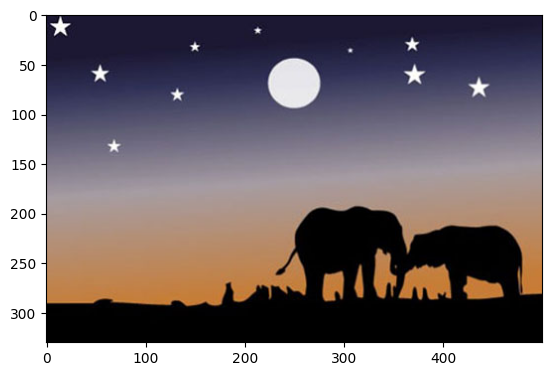

In [88]:
plt.imshow(im) # as RGB Format
plt.show()

In [89]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








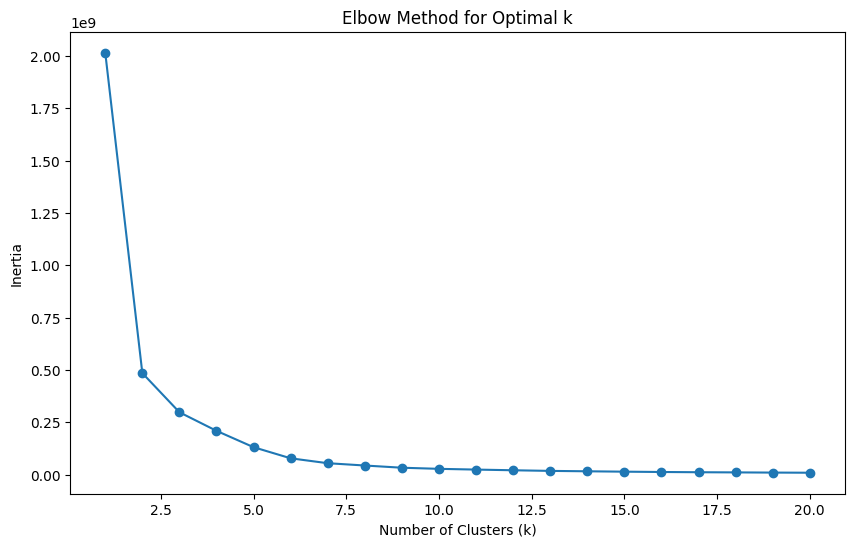

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(all_pixels)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# # Silhouette Score
# silhouette_scores = []
# for i in range(2, 21):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(all_pixels)
#     silhouette_scores.append(silhouette_score(all_pixels, kmeans.labels_))

# plt.plot(range(2, 21), silhouette_scores, marker='o')
# plt.title('Silhouette Score for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.show()


## Visualize Dominant Color

In [91]:
dominant_colors = 6

kmeans = KMeans(n_clusters=dominant_colors, random_state=42)
kmeans.fit(all_pixels)


KMeans(n_clusters=6, random_state=42)

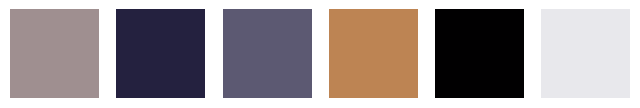

In [92]:
centers = kmeans.cluster_centers_
centers = np.array(centers, dtype='uint8')

plt.figure(figsize=(8, 2))
for i in range(dominant_colors):
    plt.subplot(1, dominant_colors, i+1)
    plt.axis('off')

    # Reshape the center to a 1x1 image with 3 color channels
    color_patch = np.reshape(centers[i], (1, 1, 3))
    plt.imshow(color_patch)

plt.show()

## Segmenting original image

In [93]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


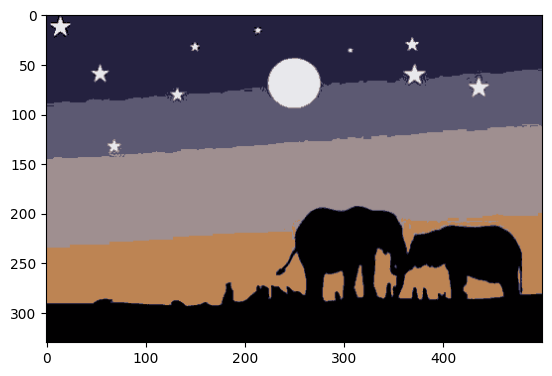

In [94]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()